# Sentiment Analysis on a Restaurant Review dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/Relevel/main/Restaurant_Reviews.tsv",
                delimiter="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
df.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [7]:
df.Liked.value_counts(normalize=True)

1    0.5
0    0.5
Name: Liked, dtype: float64

In [8]:
df.groupby(['Liked']).size()

Liked
0    500
1    500
dtype: int64

In [9]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
df['Review'][3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [12]:
df['Review'][4]

'The selection on the menu was great and so were the prices.'

In [13]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
df['Review'][0]

'Wow... Loved this place.'

In [16]:
import re

re.sub('[^a-zA-Z]',' ', "@Gandhi Jayanti is celebrated on 02 Oct of every year!!!!")

' Gandhi Jayanti is celebrated on    Oct of every year    '

In [17]:
# Remove numbers and punctuations

import re
review = re.sub('[^a-zA-Z]',' ', df['Review'][0])
print(review)

Wow    Loved this place 


In [18]:
review = review.lower()
review

'wow    loved this place '

In [19]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ingledarshan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
len(stopwords.words("english"))

179

In [21]:
review

'wow    loved this place '

In [22]:
review = review.split()
review

['wow', 'loved', 'this', 'place']

In [23]:
review1 = [ word for word in review if not word in stopwords.words('english') ]
review1

['wow', 'loved', 'place']

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review1 = [ ps.stem(word) for word in review1 ]
review1

['wow', 'love', 'place']

In [25]:
review2 = " ".join(review1)
review2

'wow love place'

In [26]:
corpus1 = []
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2)
print(review2)
corpus1.append(review2)
print(corpus1)
X = cv.fit_transform(corpus1)
print(X.toarray())

wow love place
['wow love place']
[[1 1]]


In [27]:
df.shape

(1000, 2)

In [28]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [29]:
import re
import nltk
# nltk.download("stopwords")
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(1000):
    review = re.sub('[^a-zA-Z]',' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review = " ".join(review)
    print(review)
    corpus.append(review)

wow love place
crust good
tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price
get angri want damn pho
honeslti tast fresh
potato like rubber could tell made ahead time kept warmer
fri great
great touch
servic prompt
would go back
cashier care ever say still end wayyy overpr
tri cape cod ravoli chicken cranberri mmmm
disgust pretti sure human hair
shock sign indic cash
highli recommend
waitress littl slow servic
place worth time let alon vega
like
burritto blah
food amaz
servic also cute
could care less interior beauti
perform
right red velvet cake ohhh stuff good
never brought salad ask
hole wall great mexican street taco friendli staff
took hour get food tabl restaur food luke warm sever run around like total overwhelm
worst salmon sashimi
also combo like burger fri beer decent deal
like final blow
found place accid could happier
seem like good quick place grab bite familiar pub food favor look elsewher
overal like place lot
redeem qualiti r

place deserv one star food
disgrac
def come back bowl next time
want healthi authent ethic food tri place
continu come ladi night andddd date night highli recommend place anyon area
sever time past experi alway great
walk away stuf happi first vega buffet experi
servic excel price pretti reason consid vega locat insid crystal shop mall aria
summar food incred nay transcend noth bring joy quit like memori pneumat condiment dispens
probabl one peopl ever go ian like
kid pizza alway hit lot great side dish option kiddo
servic perfect famili atmospher nice see
cook perfect servic impecc
one simpli disappoint
overal disappoint qualiti food bouchon
account know get screw
great place eat remind littl mom pop shop san francisco bay area
today first tast buldogi gourmet hot dog tell ever thought possibl
left frustrat
definit soon
food realli good got full petti fast
servic fantast
total wast time
know kind best ice tea
come hungri leav happi stuf
servic give star
assur disappoint
take littl bad

hot dish hot cold dish close room temp watch staff prepar food bare hand glove everyth deep fri oil
love fri bean
alway pleasur deal
plethora salad sandwich everyth tri get seal approv
place awesom want someth light healthi summer
sushi strip place go
servic great even manag came help tabl
feel dine room colleg cook cours high class dine servic slow best
start review two star edit give one
worst sushi ever eat besid costco
excel restaur highlight great servic uniqu menu beauti set
boyfriend sat bar complet delight experi
weird vibe owner
hardli meat
better bagel groceri store
go place gyro
love owner chef one authent japanes cool dude
burger good pizza use amaz doughi flavorless
found six inch long piec wire salsa
servic terribl food mediocr
defin enjoy
order albondiga soup warm tast like tomato soup frozen meatbal
three differ occas ask well done medium well three time got bloodiest piec meat plate
two bite refus eat anymor
servic extrem slow
minut wait got tabl
serious killer hot cha

In [30]:
type(review)

str

In [31]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [32]:
type(corpus)

list

In [33]:
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [34]:
corpus_dataset.columns = ['corpus']
corpus_dataset.head()

,corpus
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [ ]:
corpus_dataset.to_csv("corpus_dataset.csv")
print("File exported successfully.")

In [35]:
# Create a Bag of Words Model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
len(X[0])

1500

In [37]:
X.shape

(1000, 1500)

In [38]:
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
cv.get_feature_names()

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [40]:
len(cv.get_feature_names())

1500

In [41]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


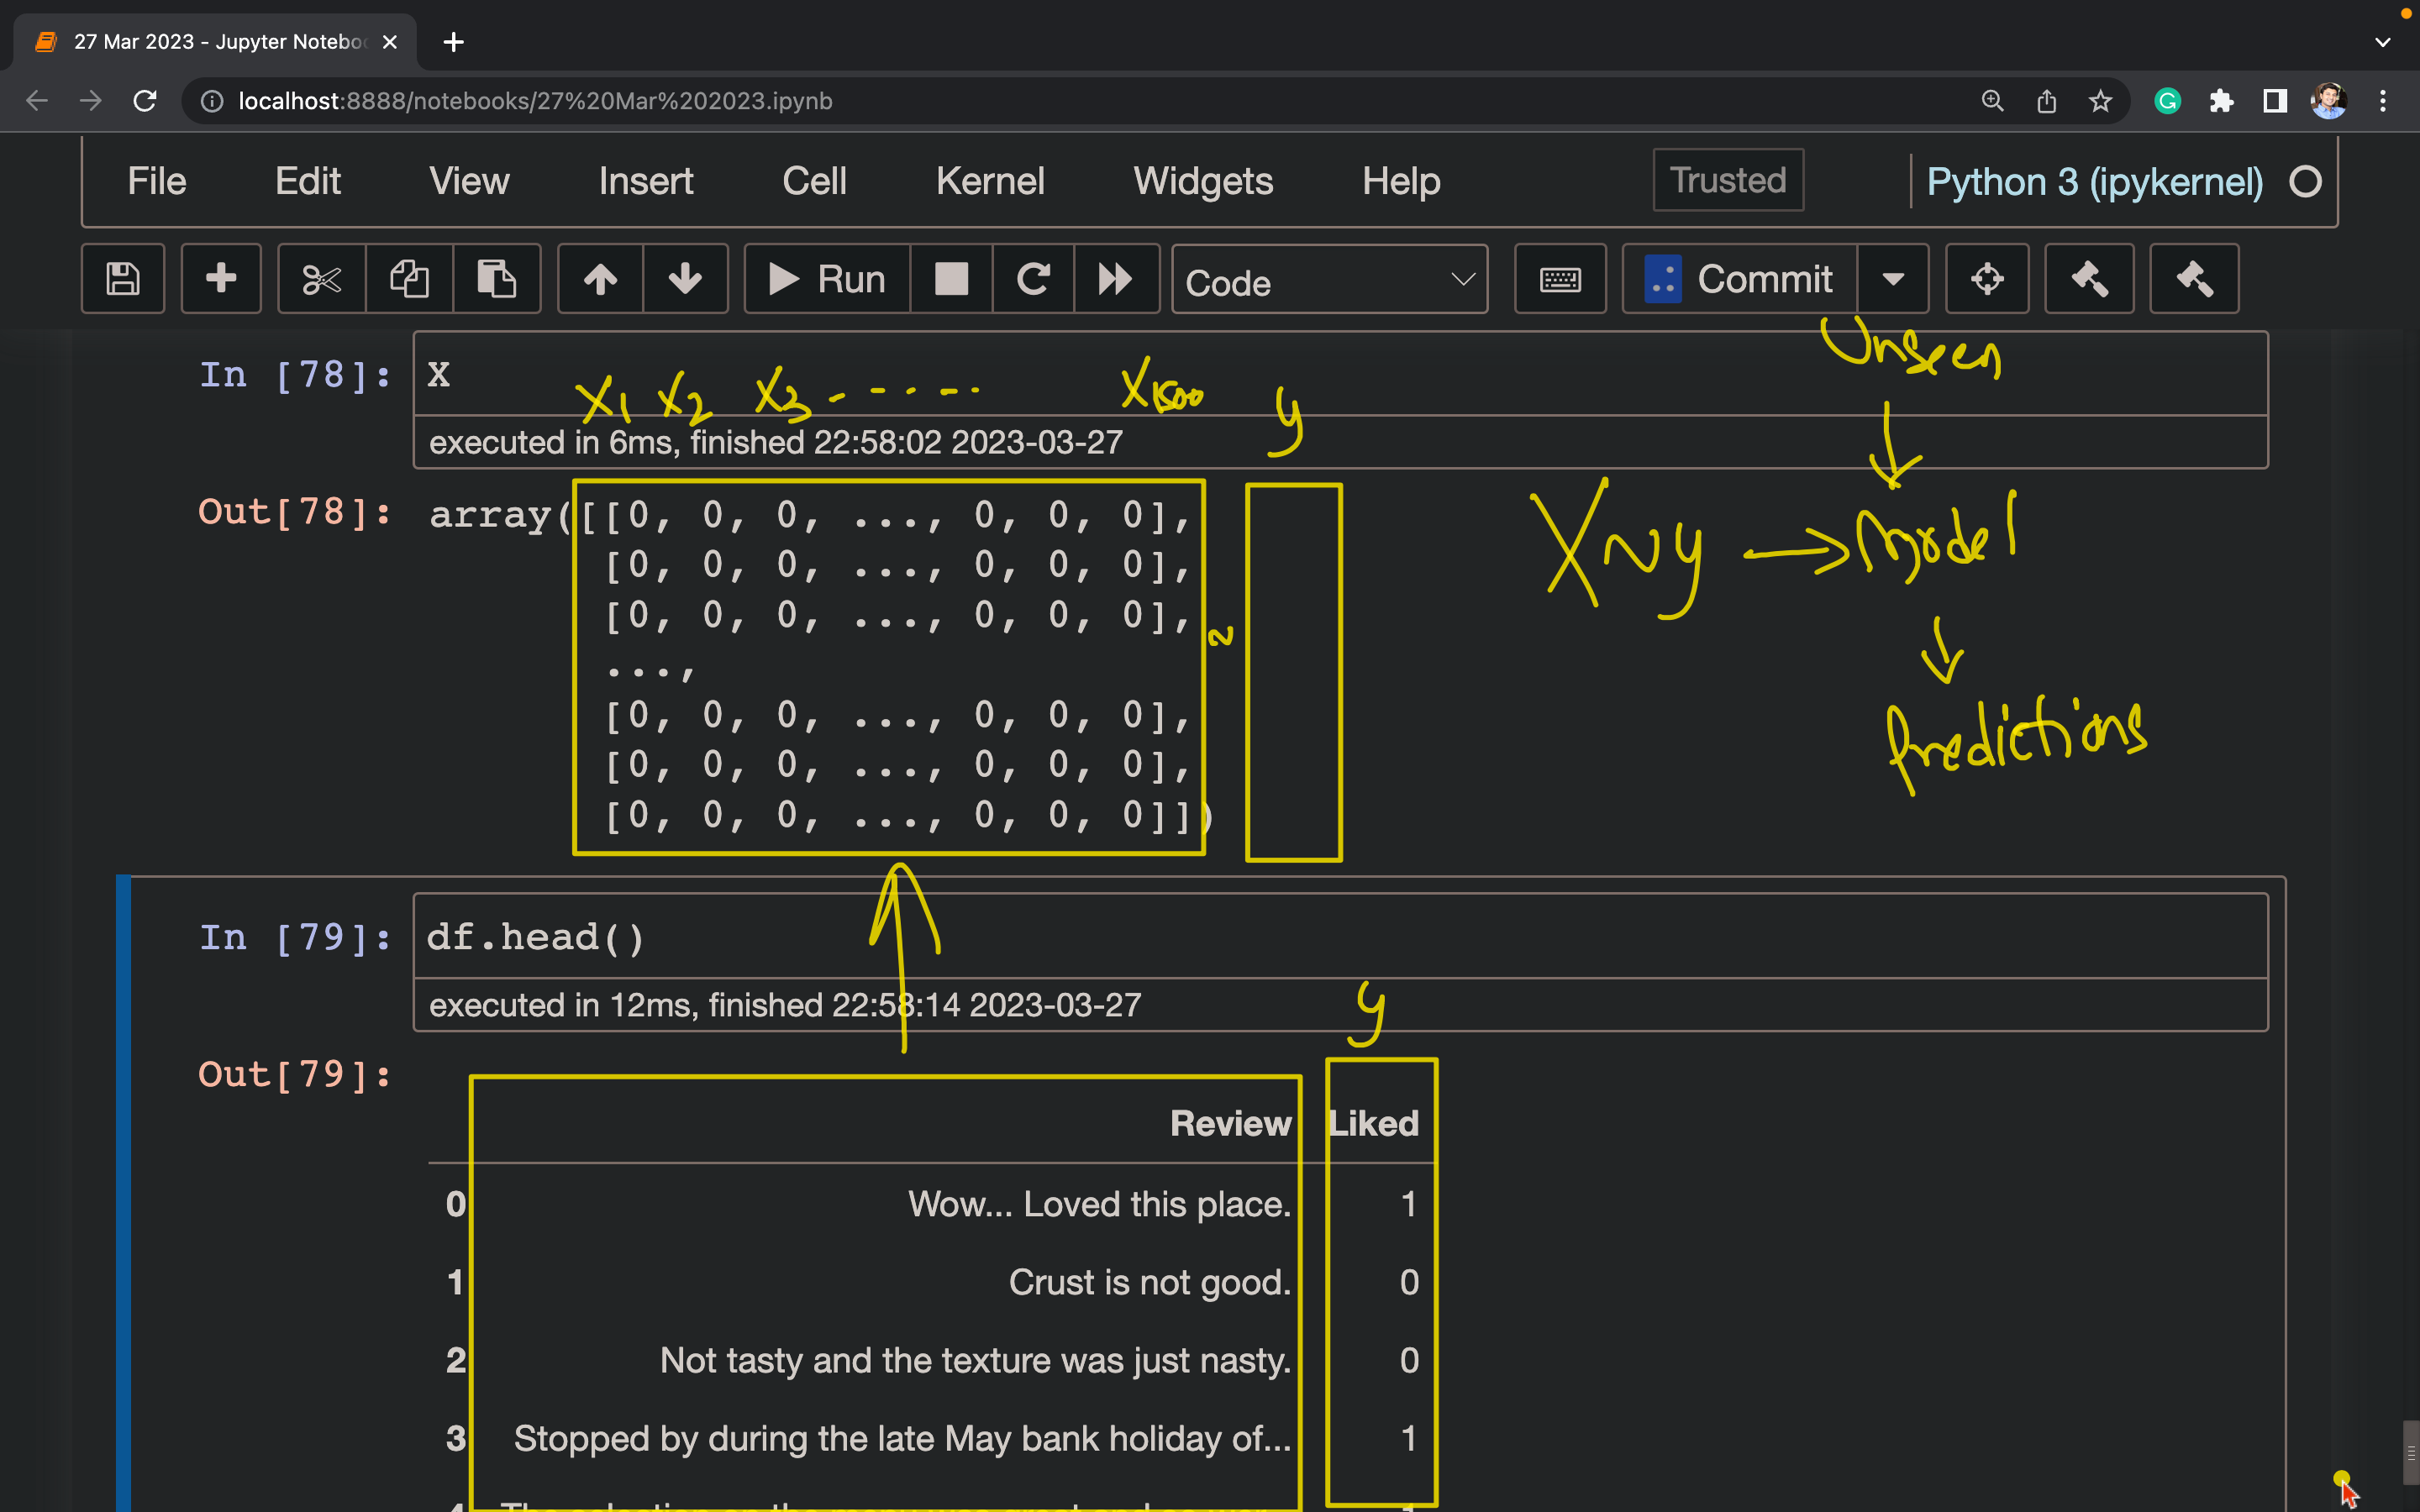

# Happy Learning

In [43]:
df.head(3)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [45]:
y = df.iloc[:,1]
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
confusion_matrix(y_test, y_pred)

array([[55, 42],
       [12, 91]])

In [52]:
accuracy_score(y_test, y_pred)

0.73

In [55]:
Review = "nice service"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [56]:
Review = "long wait time"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


In [57]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(penalty='l2', C=c, max_iter=7600, random_state=42)
    lr.fit(X_train, y_train)
    print("Accuracy for C=%s: %s" %
          (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.715
Accuracy for C=0.05: 0.725
Accuracy for C=0.25: 0.745
Accuracy for C=0.5: 0.72
Accuracy for C=1: 0.71


In [58]:
final_model = LogisticRegression(penalty='l2', C=0.25, max_iter=7600, random_state=42)
final_model.fit(X_train, y_train)
final_model

LogisticRegression(C=0.25, max_iter=7600, random_state=42)

In [59]:
accuracy_score(y_test, final_model.predict(X_test))

0.745

In [60]:
features_to_coef = {
    word: coef for word, coef in zip(cv.get_feature_names(), final_model.coef_[0])
}

print("POSITIVE")
for best_positive in sorted(features_to_coef.items(),
                           key= lambda x : x[1],
                           reverse=True)[:5]:
    print(best_positive)
    
print("PNEGATIVE")
for best_negative in sorted(features_to_coef.items(),
                           key= lambda x : x[1])[:5]:
    print(best_negative)

POSITIVE
('great', 1.7373295779748397)
('delici', 1.1353663910834448)
('love', 1.0363912320848858)
('good', 0.9859445040286019)
('amaz', 0.933327595465054)
PNEGATIVE
('bad', -0.7074279189036066)
('worst', -0.6655571092837113)
('minut', -0.6496918696866013)
('would', -0.6096031538246766)
('terribl', -0.5779317580663517)


In [61]:
y_pred_lr = final_model.predict(X_test)

In [62]:
confusion_matrix(y_test, y_pred_lr)

array([[83, 14],
       [37, 66]])

In [63]:
accuracy_score(y_test, y_pred_lr)

0.745

In [64]:
Review = "nice service"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [65]:
Review = "long wait time"

input1 = [Review]
input_data = cv.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


In [66]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [67]:
target_names = ['Positive', 'Negative']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.69      0.86      0.76        97
    Negative       0.82      0.64      0.72       103

    accuracy                           0.74       200
   macro avg       0.76      0.75      0.74       200
weighted avg       0.76      0.74      0.74       200



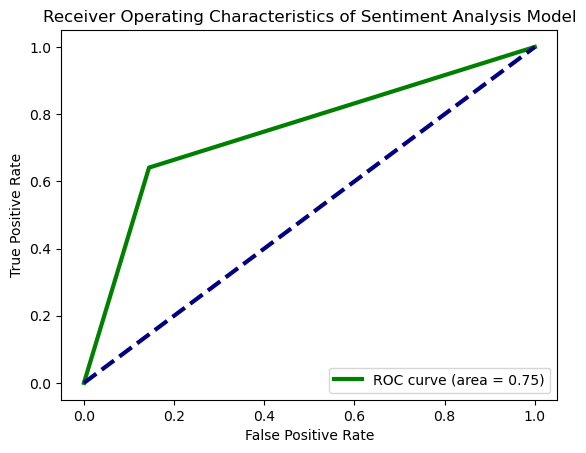

In [69]:
import matplotlib.pyplot as plt
# ROC AUC curve
rocAuc = roc_auc_score(y_test, y_pred_lr)
falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_pred_lr)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
        lw=3, label="ROC curve (area = %0.2f)" %rocAuc)
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics of Sentiment Analysis Model")
plt.legend(loc="lower right")
plt.show()

In [71]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

In [74]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[83, 14],
       [37, 66]])

In [73]:
target_names

['Positive', 'Negative']

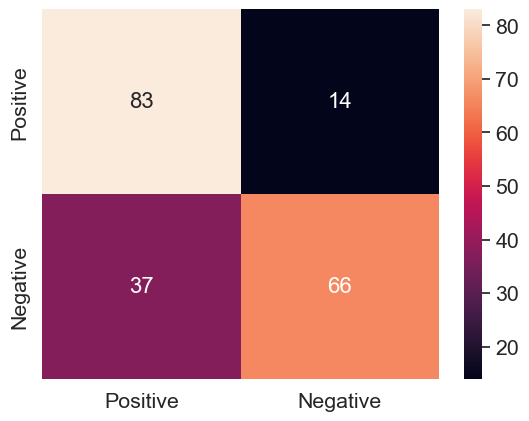

In [78]:
import seaborn as sns
sns.set(font_scale=1.4) # for label size
x_axis_labels = y_axis_labels = target_names
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g',
           xticklabels=x_axis_labels,
           yticklabels=y_axis_labels)
plt.show()

# TF-IDF

In [79]:
corpus_dataset.head()

,corpus
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [80]:
corpus_dataset.shape

(1000, 1)

In [81]:
y.shape

(1000,)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus_dataset['corpus'])
print(tfidf.vocabulary_)
print(tfidf.idf_)

{'wow': 1547, 'love': 802, 'place': 1028, 'crust': 324, 'good': 594, 'tasti': 1362, 'textur': 1374, 'nasti': 900, 'stop': 1311, 'late': 762, 'may': 834, 'bank': 92, 'holiday': 667, 'rick': 1149, 'steve': 1304, 'recommend': 1115, 'select': 1205, 'menu': 852, 'great': 608, 'price': 1062, 'get': 578, 'angri': 33, 'want': 1497, 'damn': 333, 'pho': 1016, 'honeslti': 670, 'tast': 1360, 'fresh': 553, 'potato': 1054, 'like': 785, 'rubber': 1163, 'could': 297, 'tell': 1367, 'made': 813, 'ahead': 15, 'time': 1396, 'kept': 745, 'warmer': 1499, 'fri': 554, 'touch': 1414, 'servic': 1214, 'prompt': 1074, 'would': 1545, 'go': 588, 'back': 83, 'cashier': 213, 'care': 205, 'ever': 461, 'say': 1190, 'still': 1306, 'end': 445, 'wayyy': 1507, 'overpr': 967, 'tri': 1424, 'cape': 201, 'cod': 259, 'ravoli': 1105, 'chicken': 236, 'cranberri': 310, 'mmmm': 872, 'disgust': 384, 'pretti': 1061, 'sure': 1346, 'human': 687, 'hair': 628, 'shock': 1223, 'sign': 1234, 'indic': 709, 'cash': 211, 'highli': 660, 'waitre

In [83]:
X = X.toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [84]:
X.shape

(1000, 1565)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1565), (200, 1565), (800,), (200,))

In [87]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [88]:
y_pred = classifier.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [90]:
confusion_matrix(y_test, y_pred)

array([[57, 40],
       [16, 87]])

In [91]:
accuracy_score(y_test, y_pred)

0.72

In [93]:
Review = "nice service"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [94]:
Review = "long wait time"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(penalty='l2', C=c, max_iter=7600, random_state=42)
    lr.fit(X_train, y_train)
    print("Accuracy for C=%s: %s" %
          (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.62
Accuracy for C=0.05: 0.73
Accuracy for C=0.25: 0.75
Accuracy for C=0.5: 0.75
Accuracy for C=1: 0.755


In [96]:
final_model = LogisticRegression(penalty='l2', C=1, max_iter=7600, random_state=42)
final_model.fit(X_train, y_train)
final_model

LogisticRegression(C=1, max_iter=7600, random_state=42)

In [97]:
accuracy_score(y_test, final_model.predict(X_test))

0.755

In [98]:
features_to_coef = {
    word: coef for word, coef in zip(tfidf.get_feature_names(), final_model.coef_[0])
}

print("POSITIVE")
for best_positive in sorted(features_to_coef.items(),
                           key= lambda x : x[1],
                           reverse=True)[:5]:
    print(best_positive)
    
print("NEGATIVE")
for best_negative in sorted(features_to_coef.items(),
                           key= lambda x : x[1])[:5]:
    print(best_negative)

POSITIVE
('great', 3.3942835613502034)
('delici', 2.106560029026197)
('love', 2.0624986529678924)
('good', 1.8330629689248377)
('amaz', 1.8313744044705251)
PNEGATIVE
('bad', -1.3922472440010896)
('worst', -1.2924403710213617)
('would', -1.2863088791268766)
('terribl', -1.2699875078995382)
('minut', -1.2296055945905646)


In [99]:
y_pred_lr = final_model.predict(X_test)

In [100]:
confusion_matrix(y_test, y_pred_lr)

array([[85, 12],
       [37, 66]])

In [101]:
accuracy_score(y_test, y_pred_lr)

0.755

In [103]:
Review = "nice service"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Positive.


In [104]:
Review = "long wait time"

input1 = [Review]
input_data = tfidf.transform(input1).toarray()

input_pred = final_model.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive.")
else:
    print("Review is Negative.")

Review is Negative.


In [105]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [106]:
target_names = ['Positive', 'Negative']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.70      0.88      0.78        97
    Negative       0.85      0.64      0.73       103

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.75       200
weighted avg       0.77      0.76      0.75       200



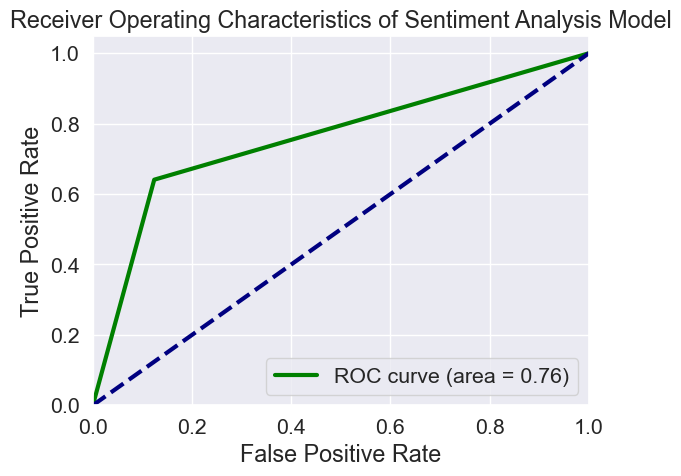

In [107]:
import matplotlib.pyplot as plt
# ROC AUC curve
rocAuc = roc_auc_score(y_test, y_pred_lr)
falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_pred_lr)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
        lw=3, label="ROC curve (area = %0.2f)" %rocAuc)
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics of Sentiment Analysis Model")
plt.legend(loc="lower right")
plt.show()

In [108]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

In [109]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[85, 12],
       [37, 66]])

In [110]:
target_names

['Positive', 'Negative']

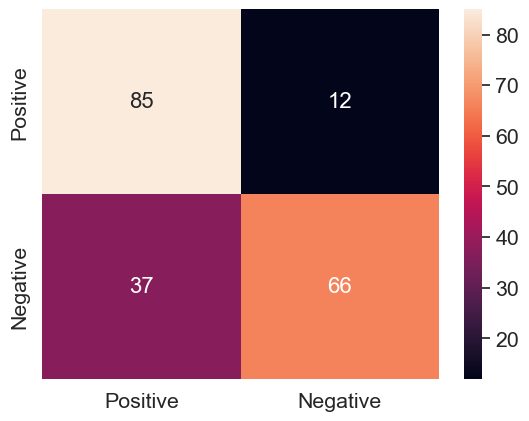

In [111]:
import seaborn as sns
sns.set(font_scale=1.4) # for label size
x_axis_labels = y_axis_labels = target_names
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g',
           xticklabels=x_axis_labels,
           yticklabels=y_axis_labels)
plt.show()

# Happy Learning